In [36]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [37]:
import cv2
import os, glob, numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf


def img_data():
    img_dir = './multi_cnn/test_final'
    categories = ['bill', 'coin', 'general_product', 'graph', 'human', 'lotto_N',
                 'lotto_P', 'microbe', 'photoshop', 'non_ad']


    image_width = 120 # 사이즈 수정
    image_height = 120

    X = []
    y = []
    y_bi = []
    index = []
    cat_index = []
    files = []
    filenames = []

    for i, category in enumerate(categories):
        img_detail = os.path.join(img_dir, category)
        files.append(glob.glob(img_detail + "/*.jpg"))
        index.append(i)


    for file, i in zip(files, index):
        for f in file:
            label = [0 for r in range(len(categories))]
            label[i] = 1

            img = data_generator(f, image_width, image_height)
            data = np.asarray(img)

            head, tail = os.path.split(f)
            filenames.append(tail)

            X.append(data)
            y.append(label)

    X = np.array(X)
    y = np.array(y)

    X = X.astype('float32') / 255

    print(len(X), len(y))
    
    return X, y

"""인자 바꾸기"""



'인자 바꾸기'

In [38]:
import cv2
import os, glob, numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf


def img_data2():
    img_dir = './multi_cnn/test'
    categories = ['bill', 'coin', 'general_product', 'graph', 'human', 'lotto_N',
                 'lotto_P', 'microbe', 'part_of_human' 'photoshop', 'picture', 'non_ad']


    image_width = 140 # 사이즈 수정
    image_height = 140

    X = []
    y = []
    y_bi = []
    index = []
    cat_index = []
    files = []
    filenames = []

    for i, category in enumerate(categories):
        img_detail = os.path.join(img_dir, category)
        files.append(glob.glob(img_detail + "/*.jpg"))
        index.append(i)


    for file, i in zip(files, index):
        for f in file:
            label = [0 for r in range(len(categories))]
            label[i] = 1

            img = data_generator(f, image_width, image_height)
            data = np.asarray(img)

            head, tail = os.path.split(f)
            filenames.append(tail)

            X.append(data)
            y.append(label)

    X = np.array(X)
    y = np.array(y)

    X = X.astype('float32') / 255

    print(len(X), len(y))
    
    return X, y

"""인자 바꾸기"""



'인자 바꾸기'

In [39]:
def print_cat_scores(X, y, prediction):
    
    print('################## 다중 분류 결과 ###################')
    #print('confusion matrix 결과')
    #print(multilabel_confusion_matrix(y.argmax(axis=1), prediction, labels=[0 for r in range(12)])) # 0 : 광고 1: 비광고

    print('precision 개별값')
    print(list(map('{:2.2f}%'.format, precision_score(y.argmax(axis=1), prediction, average=None) * 100))) # precision 개별 값
    print('recall 개별값')
    print(list(map('{:2.2f}%'.format, recall_score(y.argmax(axis=1), prediction, average=None) * 100)))

    print('evaluate값')
    print('{:2.2f}%'.format(model.evaluate(X, y)[1] * 100))
    
    print('f1 점수')
    print('{:2.2f}%'.format(f1_score(y.argmax(axis=1), prediction, average='macro') * 100))

    print('precision 평균값')
    print('{:2.2f}%'.format(precision_score(y.argmax(axis=1), prediction, average='macro') * 100)) # precision 평균 값
    
    print('recall 평균값')
    print('{:2.2f}%'.format(recall_score(y.argmax(axis=1), prediction, average='macro') * 100))
    
    print('################## 다중 분류 결과 ###################')

In [40]:
import keras.backend.tensorflow_backend as K

from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

"""수정 필요한 부분"""

# validation_rate = [0.05, 0.1, 0.15, 0.2]  # 리스트 바꾸기
#image_size = [32, 40, 50, 64, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180,
  #           190, 200, 210, 220, 230, 240, 256]

#model_layers = [2, 3, 4, 5, 6, 7, 8, 9, 10]
#epochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
#optimizer = ['adam', 'sgd', 'adagrad', 'rmsprop', 'nadam']
#learning_rate = [0.01, 0.02, 0.03, 0.04, 0.05]
#epochs = [20, 25, 30, 35, 40]
#batch_list = [16, 32, 64, 128]
#Dropout = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
#layer = [80, 81, 82]

#size = [100, 110, 120, 130, 140, 150, 160]

mod = ['9_categories', '11_categories']

"""수정 필요한 부분"""

model_evaluate = []

f1 = []
precision = []
recall = []



for m in mod: #반복문 요소 바꾸기
    ind = []
    if m == '9_categories':
        X, y = img_data()
    else:
        X, y = img_data2()
        
    model = load_model('./multi_cnn/models/data/multi_model_saved' + str(m) + '.h5')
    ##############파일 인자 수정하기 ##############
    with K.tf_ops.device('/device:GPU:0'):
        prediction = model.predict(X)
        
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지
    
    #print(prediction)
    
    for p in prediction:
        ind.append(p.argmax())
    
    prediction = ind
              
    #print('드롭아웃 : ' + str(batch)) ####### 수정
    #print_scores(X, y, prediction)
    
    #model_evaluate.append(model.evaluate(X, y)[1] * 100)
    precision.append(precision_score(y.argmax(axis=1), prediction, average='macro') * 100)
    recall.append(recall_score(y.argmax(axis=1), prediction, average='macro') * 100)
    f1.append(f1_score(y.argmax(axis=1), prediction, average='macro') * 100)

200 200
400 400


C:\ProgramData\Anaconda3\envs\tensorflow-keras\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'수정 필요한 부분'

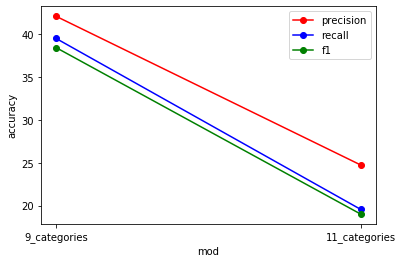

In [42]:
import matplotlib.pyplot as plt

"""카테고리 분류 """

"""수정 필요한 부분"""

plt.plot(mod, precision, 'ro-', label='precision') # 리스트 수정
plt.plot(mod, recall, 'bo-', label='recall')
plt.plot(mod, f1, 'go-', label='f1')
#plt.plot(mod, model_evaluate, 'yo-', label='evaluate')
plt.xlabel('mod') # xlabel 수정
plt.ylabel('accuracy')
plt.legend()

"""수정 필요한 부분"""

In [44]:
print('f1 점수')
print('{:2.2f}%'.format(f1[0]) * 100)

f1 점수
38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%38.43%
